In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pickle
import seaborn as sns

,acousticness,energy,loudness,year,popularity
0,0.991000,0.224,-12.628,1920,12
1,0.643000,0.517,-7.261,1920,7
2,0.993000,0.186,-12.098,1920,4
3,0.000173,0.798,-7.311,1920,17
4,0.295000,0.707,-6.036,1920,2
...,...,...,...,...,...
174384,0.009170,0.866,-5.089,2020,0
174385,0.795000,0.211,-11.665,2021,0
174386,0.806000,0.589,-12.393,2020,0
174387,0.920000,0.240,-12.077,2021,69


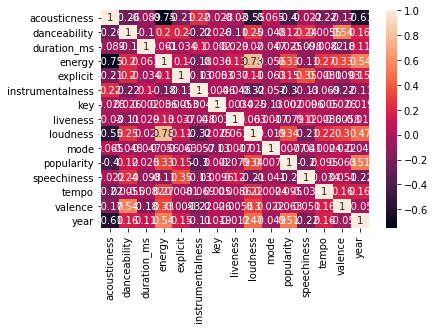

In [23]:
# y - popularity
# acousticness, danceability, energy, speechiness, duration
df = pd.read_csv("dataset\data.csv")
sns.heatmap(df.corr(),annot=True)
# df=df[['acousticness', 'danceability', 'duration_ms', 'energy', 
#         'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 
#         'speechiness', 'tempo', 'valence', 'popularity']]
df=df[['acousticness', 'energy', 'loudness', 'year', 'popularity']]
df.dropna()

In [24]:
X = np.array(df.drop(['popularity'], axis=1))
# X = preprocessing.scale(X)
y = np.array(df['popularity'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [30]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [31]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.2813412715245307


In [32]:
with open('model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [37]:
print(clf.predict([[0.99, 0.224, -12.628, 1920]]))

[4.20060591]
